<div style="border: 2px solid #d4af37; padding: 25px; background-color: #000000; border-radius: 12px; box-shadow: 0 6px 12px rgba(212, 175, 55, 0.3); text-align: center; position: relative;">
    <h3 style="color: #d4af37; margin: 0; font-weight: bold; font-family: 'Arial', sans-serif; letter-spacing: 1px;">march-machine-learning-mania-2025</h3>
    <p style="color: #d4af37; font-family: 'Brush Script MT', cursive; font-size: 12px; text-align: right; margin: 0; position: absolute; bottom: 2px; right: 10px;">AMAR</p>
</div>

# Introduction

In [1]:
def project_intro():
    print("""
    ==================================================
    Project: Building a Predictive Model for NCAA March Madness Outcomes
    ==================================================

    Project Objective:
    - Build a machine learning model to predict the outcomes of NCAA March Madness games.
    - Use historical data to train and evaluate the model.

    Data Used:
    - MTeams.csv: Teams data.
    - MSeasons.csv: Seasons data.
    - MNCAATourneySeeds.csv: Tournament seeding data.
    - MRegularSeasonCompactResults.csv: Regular season game results.
    - MNCAATourneyCompactResults.csv: Tournament game results.
    - MRegularSeasonDetailedResults.csv: Detailed game statistics.
    - MMasseyOrdinals.csv: Team rankings.

    Workflow:
    1. Load the data.
    2. Perform exploratory data analysis (EDA).
    3. Conduct feature engineering.
    4. Build the model using LightGBM.
    5. Generate a submission file for the competition.

    Tools Used:
    - Python, Pandas, Matplotlib, Seaborn, LightGBM, Scikit-learn.

    Expected Outcomes:
    - Accurate predictions for game outcomes.
    - A Log Loss of less than 0.45.
    - A ready-to-submit file for the competition.
    """)

# Run the introduction
project_intro()



    Project: Building a Predictive Model for NCAA March Madness Outcomes

    Project Objective:
    - Build a machine learning model to predict the outcomes of NCAA March Madness games.
    - Use historical data to train and evaluate the model.

    Data Used:
    - MTeams.csv: Teams data.
    - MSeasons.csv: Seasons data.
    - MNCAATourneySeeds.csv: Tournament seeding data.
    - MRegularSeasonCompactResults.csv: Regular season game results.
    - MNCAATourneyCompactResults.csv: Tournament game results.
    - MRegularSeasonDetailedResults.csv: Detailed game statistics.
    - MMasseyOrdinals.csv: Team rankings.

    Workflow:
    1. Load the data.
    2. Perform exploratory data analysis (EDA).
    3. Conduct feature engineering.
    4. Build the model using LightGBM.
    5. Generate a submission file for the competition.

    Tools Used:
    - Python, Pandas, Matplotlib, Seaborn, LightGBM, Scikit-learn.

    Expected Outcomes:
    - Accurate predictions for game outcomes.
    - A L

# *Import Libraries*

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import lightgbm as lgb

DATA_PATH = "/kaggle/input/march-machine-learning-mania-2025"

# Load Data
def load_data():
    teams = pd.read_csv(f"{DATA_PATH}/MTeams.csv")
    seasons = pd.read_csv(f"{DATA_PATH}/MSeasons.csv") 
    seeds = pd.read_csv(f"{DATA_PATH}/MNCAATourneySeeds.csv") 
    regular_results = pd.read_csv(f"{DATA_PATH}/MRegularSeasonCompactResults.csv")
    tourney_results = pd.read_csv(f"{DATA_PATH}/MNCAATourneyCompactResults.csv") 
    detailed_results = pd.read_csv(f"{DATA_PATH}/MRegularSeasonDetailedResults.csv")  
    massey_ordinals = pd.read_csv(f"{DATA_PATH}/MMasseyOrdinals.csv")  
    
    return teams, seasons, seeds, regular_results, tourney_results, detailed_results, massey_ordinals

teams, seasons, seeds, regular_results, tourney_results, detailed_results, massey_ordinals = load_data()

# Show 5 first columns
display(teams.head())
display(seasons.head())
display(seeds.head())
display(regular_results.head())
display(tourney_results.head())
display(detailed_results.head())
display(massey_ordinals.head())


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/02/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


# *EDA*

In [3]:
# INFO
display(teams.info())
display(seasons.info())
display(seeds.info())
display(regular_results.info())
display(tourney_results.info())
display(detailed_results.info())
display(massey_ordinals.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TeamID         380 non-null    int64 
 1   TeamName       380 non-null    object
 2   FirstD1Season  380 non-null    int64 
 3   LastD1Season   380 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   41 non-null     int64 
 1   DayZero  41 non-null     object
 2   RegionW  41 non-null     object
 3   RegionX  41 non-null     object
 4   RegionY  41 non-null     object
 5   RegionZ  41 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2558 non-null   int64 
 1   Seed    2558 non-null   object
 2   TeamID  2558 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 60.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191796 entries, 0 to 191795
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   191796 non-null  int64 
 1   DayNum   191796 non-null  int64 
 2   WTeamID  191796 non-null  int64 
 3   WScore   191796 non-null  int64 
 4   LTeamID  191796 non-null  int64 
 5   LScore   191796 non-null  int64 
 6   WLoc     191796 non-null  object
 7   NumOT    191796 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 11.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2518 non-null   int64 
 1   DayNum   2518 non-null   int64 
 2   WTeamID  2518 non-null   int64 
 3   WScore   2518 non-null   int64 
 4   LTeamID  2518 non-null   int64 
 5   LScore   2518 non-null   int64 
 6   WLoc     2518 non-null   object
 7   NumOT    2518 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 157.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117748 entries, 0 to 117747
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   117748 non-null  int64 
 1   DayNum   117748 non-null  int64 
 2   WTeamID  117748 non-null  int64 
 3   WScore   117748 non-null  int64 
 4   LTeamID  117748 non-null  int64 
 5   LScore   117748 non-null  int64 
 6   WLoc     117748 non-null  object
 7   NumOT    117748 non-null  int64 
 8   WFGM     117748 non-null  int64 
 9   WFGA     117748 non-null  int64 
 10  WFGM3    117748 non-null  int64 
 11  WFGA3    117748 non-null  int64 
 12  WFTM     117748 non-null  int64 
 13  WFTA     117748 non-null  int64 
 14  WOR      117748 non-null  int64 
 15  WDR      117748 non-null  int64 
 16  WAst     117748 non-null  int64 
 17  WTO      117748 non-null  int64 
 18  WStl     117748 non-null  int64 
 19  WBlk     117748 non-null  int64 
 20  WPF      117748 non-null  int64 
 21  LFGM     1

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489117 entries, 0 to 5489116
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Season         int64 
 1   RankingDayNum  int64 
 2   SystemName     object
 3   TeamID         int64 
 4   OrdinalRank    int64 
dtypes: int64(4), object(1)
memory usage: 209.4+ MB


None

In [4]:
# Descriptive analysis
display(teams.describe())
display(seasons.describe())
display(seeds.describe())
display(regular_results.describe())
display(tourney_results.describe())
display(detailed_results.describe())
display(massey_ordinals.describe())


,TeamID,FirstD1Season,LastD1Season
count,380.000000,380.000000,380.000000
mean,1290.500000,1989.618421,2023.952632
std,109.840794,9.755814,5.686894
min,1101.000000,1985.000000,1985.000000
25%,1195.750000,1985.000000,2025.000000
50%,1290.500000,1985.000000,2025.000000
75%,1385.250000,1986.250000,2025.000000
max,1480.000000,2025.000000,2025.000000


,Season
count,41.000000
mean,2005.000000
std,11.979149
min,1985.000000
25%,1995.000000
50%,2005.000000
75%,2015.000000
max,2025.000000


,Season,TeamID
count,2558.000000,2558.000000
mean,2004.376466,1290.900704
std,11.449682,103.447343
min,1985.000000,1101.000000
25%,1994.250000,1208.000000
50%,2004.000000,1285.000000
75%,2014.000000,1387.000000
max,2024.000000,1463.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,191796.000000,191796.000000,191796.000000,191796.000000,191796.000000,191796.000000,191796.000000
mean,2006.271257,73.602072,1287.599757,76.855664,1283.342286,64.771205,0.048937
std,11.623911,34.229230,104.920419,11.833224,105.102958,11.201711,0.258969
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1996.000000,45.000000,1199.000000,69.000000,1191.000000,57.000000,0.000000
50%,2007.000000,75.000000,1285.000000,76.000000,1281.000000,64.000000,0.000000
75%,2016.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,2025.000000,132.000000,1480.000000,186.000000,1480.000000,150.000000,6.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,2004.374106,139.150913,1284.984114,76.867355,1291.419778,65.077442,0.066720
std,11.447616,4.218254,101.039491,11.768184,103.424835,11.043525,0.278191
min,1985.000000,134.000000,1101.000000,43.000000,1101.000000,29.000000,0.000000
25%,1994.250000,136.000000,1207.000000,69.000000,1209.000000,58.000000,0.000000
50%,2004.000000,137.000000,1276.000000,76.000000,1286.500000,64.000000,0.000000
75%,2014.000000,139.000000,1385.000000,84.000000,1387.000000,72.000000,0.000000
max,2024.000000,154.000000,1463.000000,149.000000,1463.000000,115.000000,3.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,117748.000000,117748.000000,117748.00000,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000,...,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000,117748.000000
mean,2014.146355,70.294986,1288.25451,75.878936,1283.138830,63.888287,0.068689,26.401824,55.760242,7.347445,...,20.159790,12.073403,17.732454,10.461740,21.625650,11.409722,13.888907,6.004739,2.868185,19.305780
std,6.515929,35.772556,105.34750,10.998547,104.795432,10.848767,0.305098,4.680314,7.456374,3.119260,...,6.068136,5.344049,7.081056,4.221039,4.518197,3.724567,4.382700,2.745969,2.019050,4.553353
min,2003.000000,0.000000,1101.00000,34.000000,1101.000000,20.000000,0.000000,10.000000,26.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2009.000000,40.000000,1199.00000,68.000000,1192.000000,57.000000,0.000000,23.000000,51.000000,5.000000,...,16.000000,8.000000,13.000000,7.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2014.000000,73.000000,1287.00000,75.000000,1282.000000,64.000000,0.000000,26.000000,55.000000,7.000000,...,20.000000,12.000000,17.000000,10.000000,21.000000,11.000000,14.000000,6.000000,3.000000,19.000000
75%,2020.000000,101.000000,1381.00000,83.000000,1374.000000,71.000000,0.000000,29.000000,60.000000,9.000000,...,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2025.000000,132.000000,1480.00000,149.000000,1480.000000,144.000000,6.000000,57.000000,103.000000,26.000000,...,59.000000,48.000000,65.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


,Season,RankingDayNum,TeamID,OrdinalRank
count,5.489117e+06,5.489117e+06,5.489117e+06,5.489117e+06
mean,2.015525e+03,8.474585e+01,1.285712e+03,1.737884e+02
std,6.081657e+00,3.303180e+01,1.051970e+02,1.015146e+02
min,2.003000e+03,0.000000e+00,1.101000e+03,1.000000e+00
25%,2.011000e+03,5.800000e+01,1.195000e+03,8.600000e+01
50%,2.016000e+03,8.600000e+01,1.284000e+03,1.730000e+02
75%,2.020000e+03,1.140000e+02,1.377000e+03,2.610000e+02
max,2.025000e+03,1.330000e+02,1.480000e+03,3.640000e+02


In [5]:
# Chek missing value
display(teams.isnull().sum())
display(seasons.isnull().sum())
display(seeds.isnull().sum())
display(regular_results.isnull().sum())
display(tourney_results.isnull().sum())
display(detailed_results.isnull().sum())
display(massey_ordinals.isnull().sum())


TeamID           0
TeamName         0
FirstD1Season    0
LastD1Season     0
dtype: int64

Season     0
DayZero    0
RegionW    0
RegionX    0
RegionY    0
RegionZ    0
dtype: int64

Season    0
Seed      0
TeamID    0
dtype: int64

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

Season           0
RankingDayNum    0
SystemName       0
TeamID           0
OrdinalRank      0
dtype: int64

In [6]:
# Chek duplicated value
display(teams.duplicated().sum())
display(seasons.duplicated().sum())
display(seeds.duplicated().sum())
display(regular_results.duplicated().sum())
display(tourney_results.duplicated().sum())
display(detailed_results.duplicated().sum())
display(massey_ordinals.duplicated().sum())


0

0

0

0

0

0

0

# *Analysis*

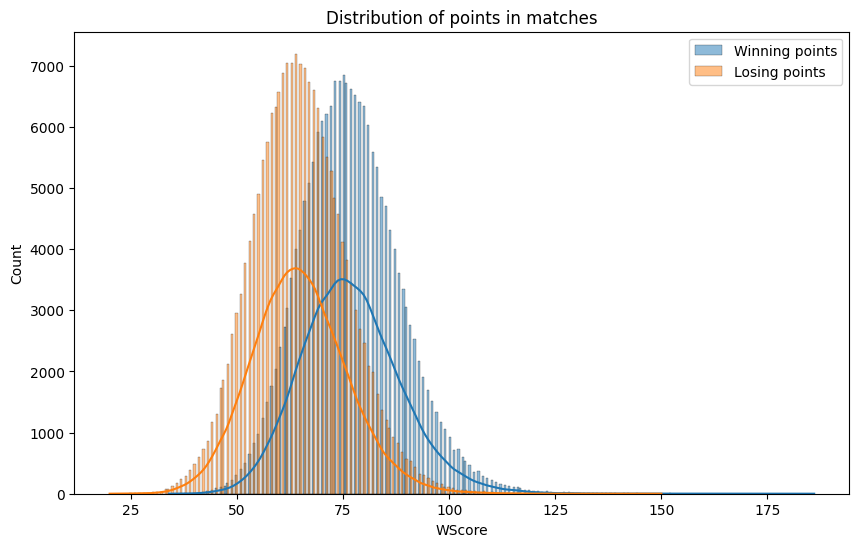

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(regular_results['WScore'], kde=True, label='Winning points')
sns.histplot(regular_results['LScore'], kde=True, label='Losing points')
plt.title('Distribution of points in matches')
plt.legend()
plt.show()

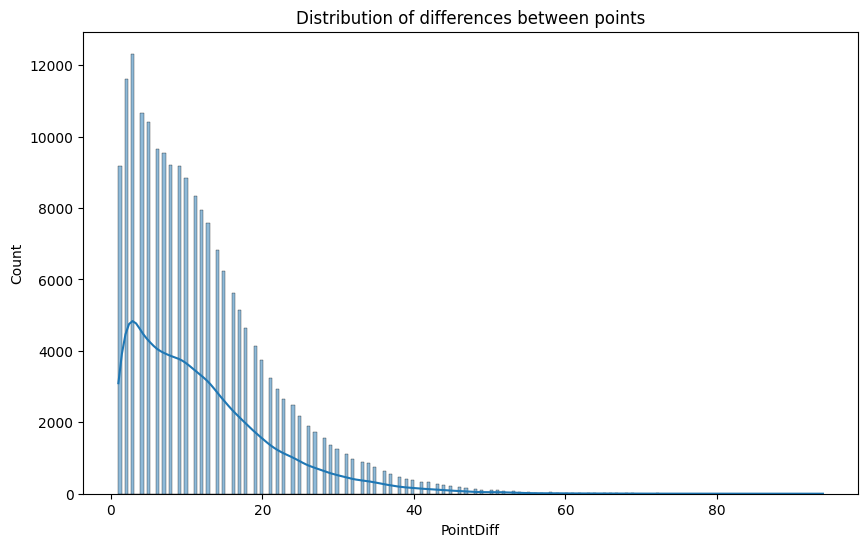

In [8]:
regular_results['PointDiff'] = regular_results['WScore'] - regular_results['LScore']
plt.figure(figsize=(10, 6))
sns.histplot(regular_results['PointDiff'], kde=True)
plt.title('Distribution of differences between points')
plt.show()

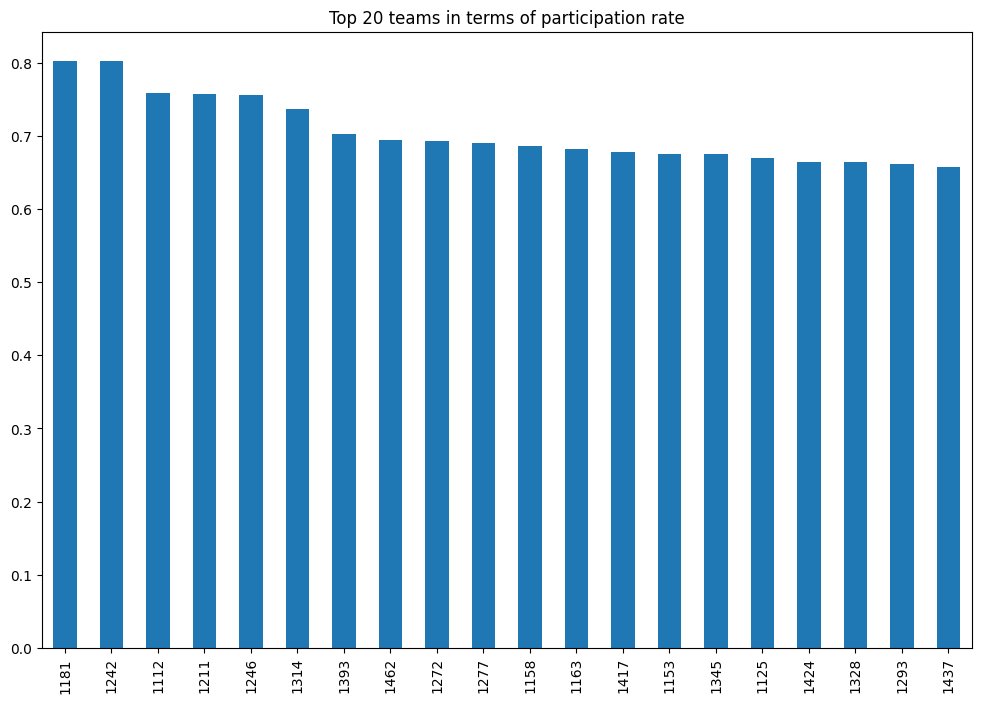

In [9]:
win_counts = regular_results['WTeamID'].value_counts()
loss_counts = regular_results['LTeamID'].value_counts()
total_games = win_counts.add(loss_counts, fill_value=0)
win_ratio = win_counts / total_games
win_ratio = win_ratio.sort_values(ascending=False)
    
plt.figure(figsize=(12, 8))
win_ratio.head(20).plot(kind='bar')
plt.title('Top 20 teams in terms of participation rate')
plt.show()

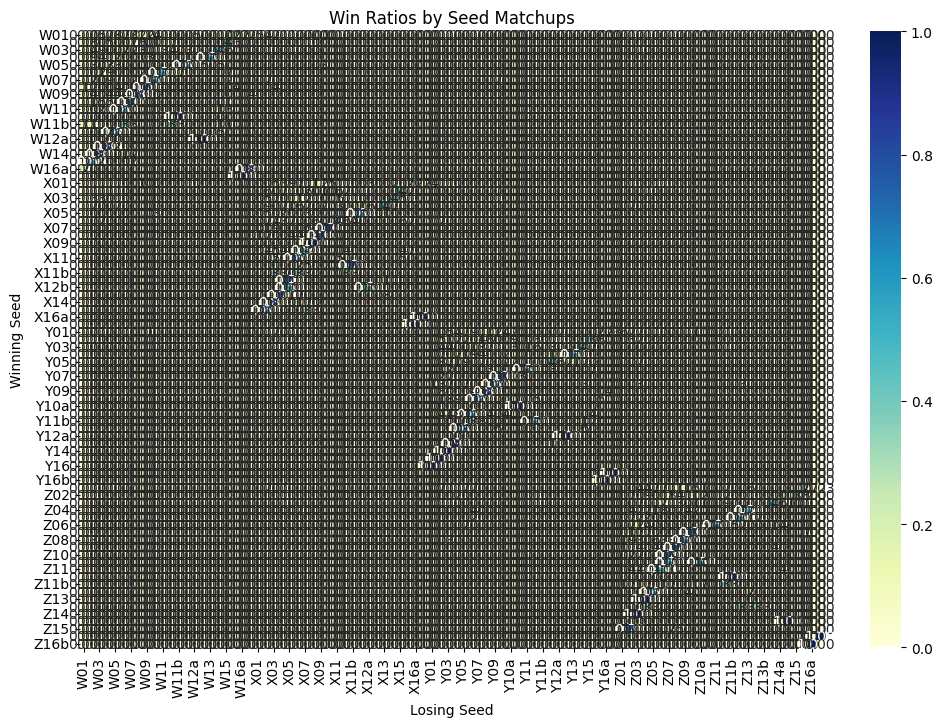

In [10]:
merged_data = tourney_results.merge(seeds, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
merged_data = merged_data.merge(seeds, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], suffixes=('_W', '_L'))
    
seed_win_ratios = merged_data.groupby(['Seed_W', 'Seed_L']).size().unstack().fillna(0)
seed_win_ratios = seed_win_ratios.div(seed_win_ratios.sum(axis=1), axis=0)
    
plt.figure(figsize=(12, 8))
sns.heatmap(seed_win_ratios, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Win Ratios by Seed Matchups")
plt.xlabel("Losing Seed")
plt.ylabel("Winning Seed")
plt.show()

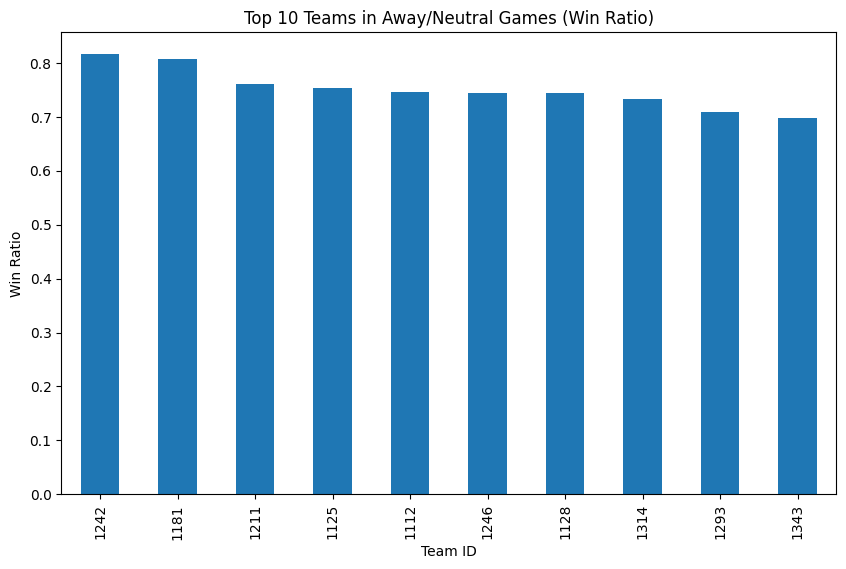

In [11]:
away_neutral_games = regular_results[regular_results['WLoc'].isin(['A', 'N'])]
    
away_wins = away_neutral_games['WTeamID'].value_counts()
total_away_games = away_neutral_games['WTeamID'].value_counts() + away_neutral_games['LTeamID'].value_counts()
away_win_ratio = (away_wins / total_away_games).sort_values(ascending=False)
    
plt.figure(figsize=(10, 6))
away_win_ratio.head(10).plot(kind='bar')
plt.title("Top 10 Teams in Away/Neutral Games (Win Ratio)")
plt.xlabel("Team ID")
plt.ylabel("Win Ratio")
plt.show()

# *Feature Engineering*

In [12]:
# Feature Engineering
def feature_engineering(regular_results, detailed_results, massey_ordinals):
    team_stats = regular_results.groupby('WTeamID').agg({'WScore': ['mean', 'count']})
    team_stats.columns = ['AvgPointsScored', 'GamesWon']
    team_stats['AvgPointsAllowed'] = regular_results.groupby('LTeamID')['LScore'].mean()
    team_stats['GamesLost'] = regular_results.groupby('LTeamID')['LScore'].count()
    team_stats['TotalGames'] = team_stats['GamesWon'] + team_stats['GamesLost']
    team_stats['WinRatio'] = team_stats['GamesWon'] / team_stats['TotalGames']
    
    detailed_results['OffensiveEfficiency'] = (detailed_results['WFGM'] + 1.5 * detailed_results['WFGM3']) / detailed_results['WFGA']
    detailed_results['DefensiveEfficiency'] = (detailed_results['LFGM'] + 1.5 * detailed_results['LFGM3']) / detailed_results['LFGA']
    
    latest_rankings = massey_ordinals[massey_ordinals['RankingDayNum'] == 133]
    team_stats = team_stats.merge(latest_rankings[['TeamID', 'OrdinalRank']], left_index=True, right_on='TeamID', how='left')
    
    return team_stats

# *build_model*

In [13]:
# Model Building
def build_model(train_data):
    # Split Data
    X = train_data.drop(['WinRatio'], axis=1)
    y = train_data['WinRatio']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # LightGBM Model
    params = {
        'objective': 'binary',
        'metric': 'logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9
    }
    
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    
    model = lgb.train(params, train_data, valid_sets=[val_data], num_boost_round=1000, early_stopping_rounds=50)
    
    return model

# *Generate_submission*

In [14]:
def generate_submission(model, teams, seasons, seeds, output_path="submission.csv"):

    tourney_teams = seeds[seeds['Season'] == 2025]['TeamID'].unique()
    
    from itertools import combinations
    matchups = list(combinations(tourney_teams, 2))
    
    submission_data = []
    for team1, team2 in matchups:
        if team1 < team2:
            matchup_id = f"2025_{team1}_{team2}"
        else:
            matchup_id = f"2025_{team2}_{team1}"
        
        team1_stats = teams[teams['TeamID'] == team1].iloc[0]
        team2_stats = teams[teams['TeamID'] == team2].iloc[0]
        
        features = {
            'PointDiff': team1_stats['AvgPointsScored'] - team2_stats['AvgPointsAllowed'],
            'WinRatioDiff': team1_stats['WinRatio'] - team2_stats['WinRatio'],
            'RankDiff': team1_stats['OrdinalRank'] - team2_stats['OrdinalRank']
        }
        
        submission_data.append([matchup_id, features])
    
    submission_df = pd.DataFrame(submission_data, columns=['ID', 'Features'])
    
    X_submission = pd.DataFrame(submission_df['Features'].tolist())
    submission_df['Pred'] = model.predict(X_submission)
    
    submission_df[['ID', 'Pred']].to_csv(output_path, index=False)
    print(f"تم حفظ ملف التسليم في: {output_path}")

In [15]:
def main():
    # load data
    teams, seasons, seeds, regular_results, tourney_results, detailed_results, massey_ordinals = load_data()
    
    # EDA
    perform_eda(teams, seasons, seeds, regular_results, tourney_results, detailed_results, massey_ordinals)
    
    # feature_engineering
    team_stats = feature_engineering(regular_results, detailed_results, massey_ordinals)
    
    # build_model
    model = build_model(team_stats)
    
    # predict
    y_pred = model.predict(team_stats.drop(['WinRatio'], axis=1))
    print(f"Log Loss: {log_loss(team_stats['WinRatio'], y_pred)}")
    
    # generate_submission
    generate_submission(model, teams, seasons, seeds)


Thank you for checking out this notebook! If you found it useful, feel free to upvote it ❤️.

Your support means a lot! 🚀🤩